# Detecting Covid-19 with Keras neural network

## 0. Import and loading

In [26]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_it = train_datagen.flow_from_directory(r'C:\Users\Gianl\OneDrive\Documenti\progetto Deep learning\COVID-19 Radiography Database\train',
                                     target_size=(256, 256),
                                     batch_size=32,
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     shuffle=True,
                                     seed=42)
# load and iterate test dataset
test_it = test_datagen.flow_from_directory(r'C:\Users\Gianl\OneDrive\Documenti\progetto Deep learning\COVID-19 Radiography Database\test', 
                                    target_size=(256, 256),
                                     batch_size=32,
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     shuffle=True,
                                     seed=42)

Found 492 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


## 1. Our models

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D

classifier = Sequential()

In [31]:
classifier.add(Convolution2D(61, 3, 2, input_shape = (256, 256, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(3, activation='softmax'))

C:\Users\Gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(61, (3, 2), input_shape=(256, 256,..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [32]:
classifier.compile( optimizer="adam",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [16]:
classifier.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 255, 61)      1159      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 61)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 983869)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               125935360 
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

## 2. Fitting

In [33]:
#definiamo step_size per train e test
STEP_SIZE_TRAIN=train_it.n//train_it.batch_size
STEP_SIZE_VALID=test_it.n//test_it.batch_size

In [34]:
STEP_SIZE_TRAIN

15

In [47]:
hist = classifier.fit_generator(generator=train_it,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_it,
                    validation_steps=STEP_SIZE_VALID,
                    epochs= 1
)

Epoch 1/1
15/15 [==============================] - 218s 15s/step - loss: 1.1255 - accuracy: 0.5562 - val_loss: 0.7096 - val_accuracy: 0.5104


## 3. Evaluation

In [36]:
evaluation = classifier.evaluate_generator(generator=test_it,
steps=STEP_SIZE_VALID)

[1.1866611242294312, 0.4583333432674408]

Accuracy: 0.55625


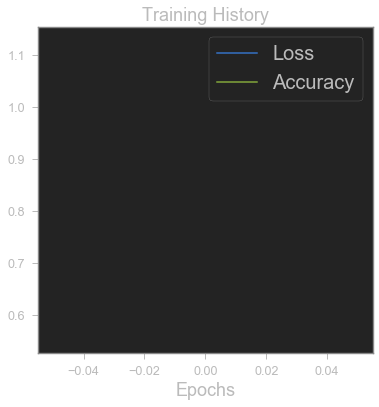

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(figsize=(6,6))

axes.plot(hist.history['loss'], label='Loss')
axes.plot(hist.history['accuracy'], label='Accuracy')

axes.set_title("Training History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)

# Final accuracy
print ("Accuracy:", hist.history['accuracy'][-1])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# convert form prediction to id
y_pred = classifier.predict(test_it)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

y_true = test_it.labels # argmax along axis 1

# compute confusion matrix
print ("Confusion Matrix")
print ( confusion_matrix(y_true, y_pred) )

# compute classification report
print ("Classification Report")
print ( classification_report(y_true, y_pred) )

In [78]:
#comando per salvare il modello
classifier.save(r'C:\Users\Gianl\OneDrive\Documenti\progetto Deep learning\COVID-19 Radiography Database\model')